<a href="https://colab.research.google.com/github/ethel-rios/Predicting-Credit-Card-Defaults-with-Logistic-Regression/blob/main/creditcard_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CreditCard.csv to CreditCard (2).csv


In [ ]:
df = pd.read_csv('CreditCard.csv')
df.info() # Display column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unique Applicant ID    400 non-null    int64  
 1    Age                   400 non-null    float64
 2    Years at Employer     400 non-null    float64
 3   Years at Address       400 non-null    float64
 4   Income                 400 non-null    float64
 5   Credit Card Debt       400 non-null    float64
 6   Automobile Debt        400 non-null    float64
 7   Outcomes: Default = 1  400 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 25.1 KB


In [ ]:
df = df.rename(columns={'Unique Applicant ID ': 'id', ' Age': 'age',' Years at Employer': 'years_employer','Years at Address': 'years_address','Income':'income', 'Credit Card Debt ':'credit_card_debt', 'Automobile Debt':'automobile_debt', 'Outcomes: Default = 1':'outcomes' })
df.head() # View the first few rows


,id,age,years_employer,years_address,income,credit_card_debt,automobile_debt,outcomes
0,1,32.53,9.39,0.30,37843.68,-3246.66,-4794.71,0
1,2,34.58,11.97,1.49,65765.23,-15597.78,-17632.17,1
2,3,37.70,12.46,0.09,61002.29,-11401.92,-7910.24,1
3,4,28.68,1.39,1.84,19952.73,-1233.38,-2408.10,0
4,5,32.61,7.49,0.23,24970.13,-1135.68,-397.32,0


In [ ]:
x_all = df[['age','years_employer', 'years_address', 'income','credit_card_debt','automobile_debt']]  # feature columns
y = df['outcomes']  # target column (binary: 0 or 1)

In [ ]:
# This function calculates the ANOVA F-value for each feature,  to rank features
# based on their statistical significance in predicting the target variable.

selector = SelectKBest(score_func=f_classif, k='all')  # Or k=3 for top 3
selector.fit(x_all, y)

# Scores for each feature
feature_scores = pd.DataFrame({
    'Feature': x.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)

            Feature      Score
4  credit_card_debt  31.430979
1    years_employer  29.507726
0               age  16.536072
5   automobile_debt  11.339678
3            income   0.272017
2     years_address   0.074353


In [ ]:
x_top3 = df[['credit_card_debt', 'years_employer', 'age']]

In [ ]:
# function to standardize, split, train and evaluate
def train_and_evaluate(x, y, model_name):
  # first split the data: test size = 20% and training size = 80%
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  # then standardize the features
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.transform(x_test)

  # create and train logistic regression model
  model = LogisticRegression()
  model.fit(x_train_scaled, y_train)

  # Predictions
  y_pred = model.predict(x_test_scaled)
  y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

  # Metrics
  accuracy = accuracy_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred_proba)
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Print results
  print(f'\n--- {model_name} ---')
  print(f'Accuracy on test set: {accuracy:.2%}')
  print(f'ROC AUC on test set: {roc_auc:.2%}')
  print('Confusion Matrix:')
  print(conf_matrix)

  # Plot Confusion Matrix
  plt.figure(figsize=(6,4))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix - {model_name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Plot ROC Curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.figure(figsize=(6,4))
  plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
  plt.plot([0,1], [0,1], linestyle='--', color='gray')
  plt.title(f'ROC Curve - {model_name}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid()
  plt.show()


--- Using 6 Variables ---
Accuracy on test set: 78.75%
ROC AUC on test set: 80.66%
Confusion Matrix:
[[57  7]
 [10  6]]


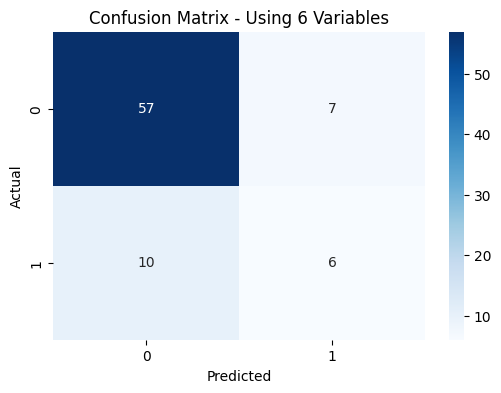

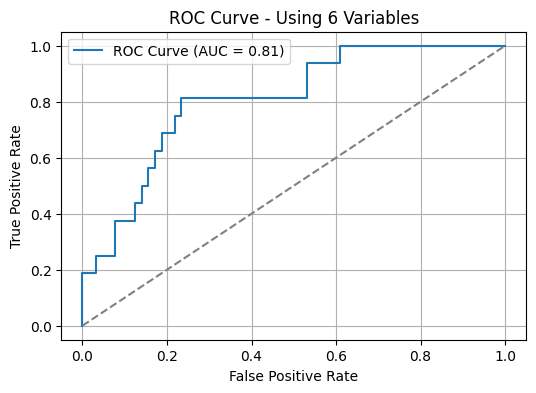

In [ ]:
# Run for all variables
train_and_evaluate(x_all, y, "Using 6 Variables")


--- Using Top 3 Variables ---
Accuracy on test set: 80.00%
ROC AUC on test set: 82.32%
Confusion Matrix:
[[58  6]
 [10  6]]


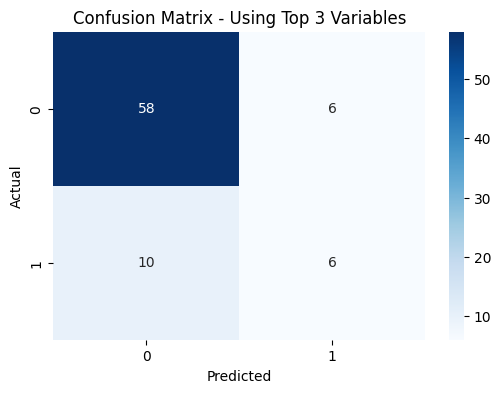

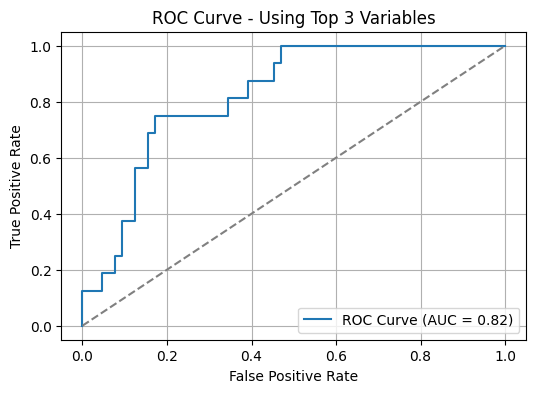

In [ ]:
# Run for top 3 features
train_and_evaluate(x_top3, y, "Using Top 3 Variables")